Library

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
import time
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Resizing, Rescaling, Activation, RandomFlip, RandomRotation, BatchNormalization
from sklearn.metrics import confusion_matrix

Import Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading Data

In [ ]:
train_path = '/content/gdrive/MyDrive/dataset/brain_tumor/Training'
test_path = '/content/gdrive/MyDrive/dataset/brain_tumor/Testing'
 
classes = ['notumor', 'glioma', 'meningioma', 'pituitary']
 
train_dataset = image_dataset_from_directory(directory=train_path, label_mode='categorical', class_names=classes)
test_dataset = image_dataset_from_directory(directory=test_path, label_mode='categorical', class_names=classes)

Found 5722 files belonging to 4 classes.
Found 1321 files belonging to 4 classes.


Model Inisialisasi

In [ ]:
model = tf.keras.models.Sequential()
 
# Preprocessing 
model.add(layers.Resizing(height=227, width=227, interpolation='bilinear'))
model.add(layers.Rescaling(scale=1./255))
 
# Data Augmentation
model.add(layers.RandomFlip(mode='horizontal_and_vertical'))
model.add(layers.RandomRotation(factor=.2))

# First Convolution
model.add(layers.Conv2D(filters=20, kernel_size=(11,11), strides=4))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding="valid"))

# Second Convolution
model.add(layers.Conv2D(filters=25, kernel_size=(5,5), strides=1))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding="valid"))

# Third Convolution
model.add(layers.Conv2D(filters=30, kernel_size=(3,3), strides=1))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding="valid"))
 
# Feed forward
model.add(layers.Flatten())
model.add(layers.Dense(4096))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

Model Training

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
179/179 [==============================] - 762s 4s/step - loss: 1.2335 - accuracy: 0.6664 - val_loss: 1.9117 - val_accuracy: 0.4489
Epoch 2/50
179/179 [==============================] - 22s 121ms/step - loss: 0.6338 - accuracy: 0.7590 - val_loss: 1.7087 - val_accuracy: 0.5102
Epoch 3/50
179/179 [==============================] - 22s 123ms/step - loss: 0.5349 - accuracy: 0.8048 - val_loss: 7.8504 - val_accuracy: 0.3611
Epoch 4/50
179/179 [==============================] - 23s 124ms/step - loss: 0.4938 - accuracy: 0.8249 - val_loss: 1.5091 - val_accuracy: 0.6949
Epoch 5/50
179/179 [==============================] - 23s 124ms/step - loss: 0.4492 - accuracy: 0.8373 - val_loss: 1.0150 - val_accuracy: 0.7699
Epoch 6/50
179/179 [==============================] - 22s 122ms/step - loss: 0.4272 - accuracy: 0.8520 - val_loss: 1.2947 - val_accuracy: 0.7570
Epoch 7/50
179/179 [==============================] - 22s 122ms/step - loss: 0.4024 - accuracy: 0.8633 - val_loss: 1.2903 - val_accu

Model Evaluate

In [ ]:
model.evaluate(test_dataset)

42/42 [==============================] - 3s 67ms/step - loss: 0.2552 - accuracy: 0.9379


[0.2552044689655304, 0.9379258155822754]

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 227, 227, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 227, 227, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 227, 227, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 20)        7280      
                                                                 
 activation (Activation)     (None, 55, 55, 20)        0         
                                                        

Model save

In [ ]:
model.save('CNN_Modifikasi_1.h5')

Training Plot

<ipython-input-9-f531bae1360e>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


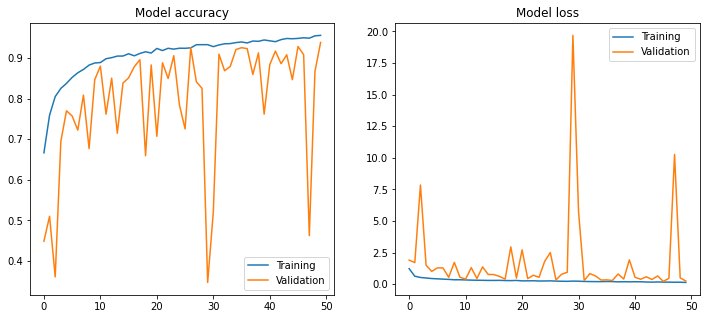

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(122)
 
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Model accuracy')
 
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Model loss')
 
plt.show()

Confusion Matrix Plot

In [ ]:
true_labels = []
predicted_labels = []
 
for x, y in test_dataset:
    true_labels.append(y)
    predicted_labels.append(model.predict(x))
    
true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

1/1 [==============================] - 0s 99ms/step


In [ ]:
true_labels_list = []
predicted_labels_list = [] 
 
for (tr_lbl, pr_lbl) in zip (true_labels, predicted_labels):
    true_labels_list.append(np.argmax(tr_lbl))
    predicted_labels_list.append(np.argmax(pr_lbl))
    
true_labels_list = np.array(true_labels_list)
predicted_labels_list = np.array(predicted_labels_list)

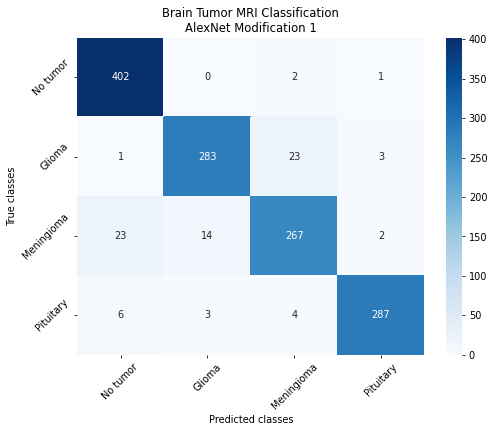

In [ ]:
labels = ['No tumor', 'Glioma', 'Meningioma', 'Pituitary']
cnf = confusion_matrix(true_labels_list, predicted_labels_list)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd')
plt.ylabel('True classes')
yticks, _ = plt.yticks()
plt.yticks(ticks=yticks, labels=labels, rotation=45)
 
plt.xlabel('Predicted classes')
xticks, _ = plt.xticks()
plt.xticks(ticks=xticks, labels=labels, rotation=45)
plt.title('Brain Tumor MRI Classification\nAlexNet Modification 1')
plt.show(ax)